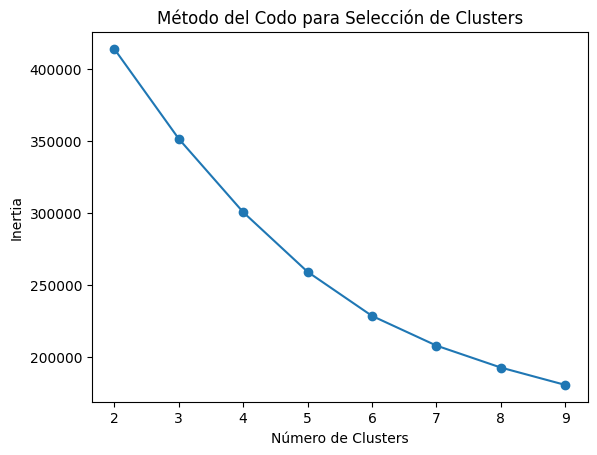

Clustering completado y datos guardados con éxito.


In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Rutas
file_path = "/Users/iclon/Documents/HAB_proyecto_7/archivos/meneame_scraped_final_3.csv"
scaler_path = "/Users/iclon/Documents/HAB_proyecto_7/archivos/scaler.pkl"
encoders_path = "/Users/iclon/Documents/HAB_proyecto_7/archivos/label_encoders.pkl"
kmeans_path = "/Users/iclon/Documents/HAB_proyecto_7/archivos/kmeans_model.pkl"
output_csv_path = "/Users/iclon/Documents/HAB_proyecto_7/archivos/data_meneame_clustered.csv"

df = pd.read_csv(file_path)

# columnas relevantes
numerical_features = ["meneos", "clicks", "karma", "positive_votes", "negative_votes", "comments"]
categorical_features = ["category", "source", "provincia", "comunidad"]

# Normalizar variables
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Guardar el escalador
with open(scaler_path, "wb") as f:
    pickle.dump(scaler, f)

label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

with open(encoders_path, "wb") as f:
    pickle.dump(label_encoders, f)

# Definir el número óptimo de clusters usando el método del codo
inertia = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df[numerical_features])
    inertia.append(kmeans.inertia_)

# Graficar método del codo
plt.plot(k_range, inertia, marker="o")
plt.xlabel("Número de Clusters")
plt.ylabel("Inertia")
plt.title("Método del Codo para Selección de Clusters")
plt.show()

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(df[numerical_features])


with open(kmeans_path, "wb") as f:
    pickle.dump(kmeans, f)

df.to_csv(output_csv_path, index=False)

print("Clustering completado y datos guardados.")

In [7]:
df

,news_id,title,content,full_story_link,meneos,clicks,karma,positive_votes,anonymous_votes,negative_votes,category,comments,published_date,user,source,source_link,provincia,comunidad,scraped_date,cluster
0,1170061,Cortan internet en Argelia,Los proveedores de internet fueron cerrados as...,https://meneame.net/story/cortan-internet-en-a...,2.524587,0.505724,-0.927091,3.040484,718,-0.427720,2,0.573119,2011-02-12 22:00:02,--205705--,14269,http://www.telegraph.co.uk/news/worldnews/afri...,20,10,2025-02-19,3
1,1169886,'Pique' entre delfines y la trainera de Orio,Un entrenamiento de la trainera de Orio muy co...,https://meneame.net/story/pique-entre-delfines...,-0.265102,2.883301,-1.370880,-0.632311,198,-0.427720,2,-0.446709,2011-02-12 21:30:02,rangaistus,4005,http://www.diariovasco.com/20110212/deportes/m...,20,10,2025-02-19,0
2,1170011,Basta de falso HD,El abuso de las emisiones en falso HD de algun...,https://meneame.net/story/basta-de-falso-hd,0.765035,2.784816,-1.271524,0.525871,409,-0.427720,2,0.747237,2011-02-12 20:55:02,roger78,4863,http://www.elpais.com/articulo/Pantallas/Basta...,20,10,2025-02-19,2
3,1169516,Las 5 maneras más extrañas en que la música pu...,La razón principal por la que existe la música...,https://meneame.net/story/5-maneras-mas-extran...,-0.569025,3.660386,-1.576215,-0.987070,137,-0.427720,2,-0.421835,2011-02-12 20:25:02,--146146--,3253,http://www.cracked.com/article_19006_the-5-wei...,20,10,2025-02-19,2
4,1169786,Empleados públicos salen hoy a la calle contra...,Miles de funcionarios se manifestarán hoy a me...,https://meneame.net/story/empleados-publicos-s...,0.908998,0.426576,-1.503354,0.285887,477,-0.074694,2,-0.222844,2011-02-12 20:00:02,Tanatos,195,http://www.abc.es/20110212/cordoba/abcp-emplea...,19,0,2025-02-19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87186,6,Instalar Linux en iPod Mini | GPL Tarragona,Enseña a instalar Linux en el iPod Mini.\n\nMu...,https://meneame.net/story/instalar-linux-en-ip...,-1.301638,-0.199409,-4.119723,-1.947005,0,-0.427720,2,-1.093430,2005-12-07 12:00:01,asappla,6705,http://www.gpltarragona.org/node/view/395,48,7,2025-02-19,0
87187,4,Entrevista de El Mundo a Jose Antonio Marina,2. ¿Es la ética la filosofía del futuro?\nSi. ...,https://meneame.net/story/entrevista-de-el-mun...,-1.336829,-0.199409,-4.179336,-2.061780,0,-0.427720,2,-1.093430,2005-12-07 11:30:01,gabrielperezs,4539,http://www.el-mundo.es/encuentros/invitados/20...,20,10,2025-02-19,0
87188,3,Prova xfce 4.2.3!,Ara que els de repositoris de totes les distri...,https://meneame.net/story/prova-xfce-423,-1.285642,-0.199409,-4.238950,-1.894835,0,-0.427720,2,-1.093430,2005-12-07 10:30:01,paurullan,16099,http://www.xfce.org/release_notes/4.2.3.1_chan...,20,10,2025-02-19,0
87189,2,Los 84 errores de noxtrum,"Pues sí, noxtrum, el buscador de TPI y Telefón...",https://meneame.net/story/los-84-errores-de-no...,-1.199264,-0.199409,-4.252197,-1.613115,0,-0.427720,2,-0.969061,2005-12-07 09:25:02,FrIkI,11473,http://www.pacoros.net/diario/2005/12/07/los-8...,20,10,2025-02-19,0


Cluster 0: Noticias con poca interacción (pocos meneos, karma bajo, menos comentarios).

Cluster 1: Noticias con clicks bajos pero karma alto, lo que sugiere que la comunidad las valora pero no generan tanto tráfico.

Cluster 2: Noticias virales con muchísimos clicks, pero karma bajo, lo que sugiere que pueden ser polémicas o de baja calidad.

Cluster 3: Noticias con alto impacto en todas las métricas: muchos meneos, votos y comentarios, lo que indica alta interacción.


/var/folders/6v/2gcr3k6s28jd1grf9bj3dp0m0000gn/T/ipykernel_58961/2390655310.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clustered["cluster"], palette="bright")


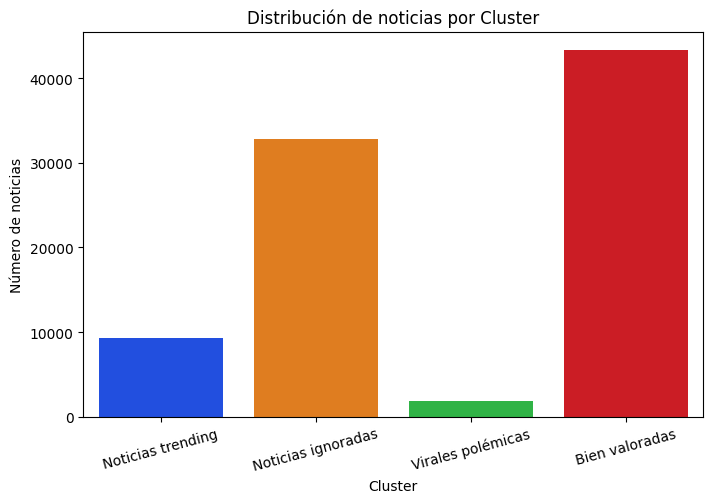

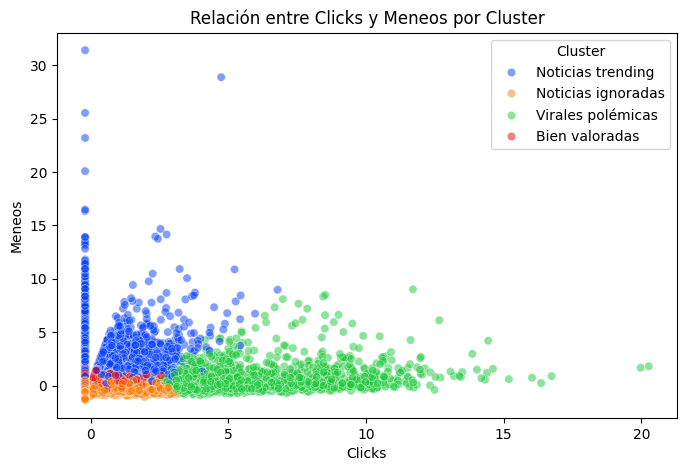

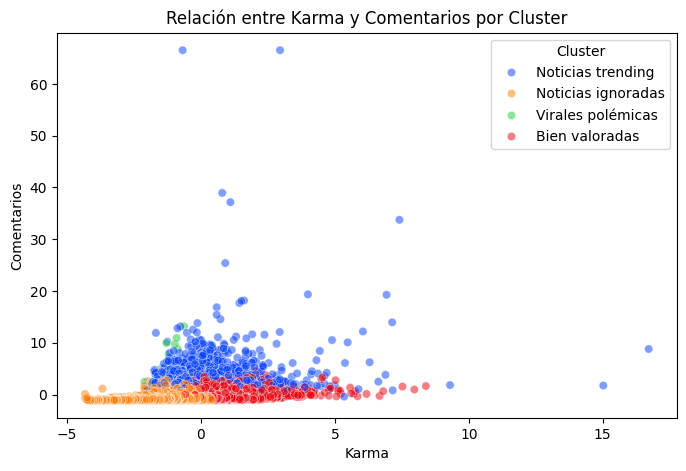

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_clustered = pd.read_csv("/Users/iclon/Documents/HAB_proyecto_7/archivos/data_meneame_clustered.csv")


cluster_labels = {
    0: "Noticias ignoradas",
    1: "Bien valoradas",
    2: "Virales polémicas",
    3: "Noticias trending"
}

df_clustered["cluster"] = df_clustered["cluster"].map(cluster_labels)

# Gráfico de barras: Número de noticias en cada cluster
plt.figure(figsize=(8, 5))
sns.countplot(x=df_clustered["cluster"], palette="bright")
plt.xlabel("Cluster")
plt.ylabel("Número de noticias")
plt.title("Distribución de noticias por Cluster")
plt.xticks(rotation=15)
plt.show()

# Gráfico de dispersión: Relación entre clicks y meneos por cluster
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_clustered["clicks"], y=df_clustered["meneos"], hue=df_clustered["cluster"], palette="bright", alpha=0.5)
plt.xlabel("Clicks")
plt.ylabel("Meneos")
plt.title("Relación entre Clicks y Meneos por Cluster")
plt.legend(title="Cluster")
plt.show()

# Gráfico de dispersión: Relación entre karma y comentarios por cluster
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_clustered["karma"], y=df_clustered["comments"], hue=df_clustered["cluster"], palette="bright", alpha=0.5)
plt.xlabel("Karma")
plt.ylabel("Comentarios")
plt.title("Relación entre Karma y Comentarios por Cluster")
plt.legend(title="Cluster")
plt.show()
